# Comparison between two linear regression models: OLS and using sklearn

## Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

## Importing data set:

In [2]:
data=pd.read_csv('USA_Housing.csv')

## Checking the head of the data set:

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Defining the indenpendent (x) and dependent (y) variables of the problem:

In [4]:
X=data.drop(['Address','Price'],axis=1)
y=data['Price']

## Performing a train/test split to avoid overfitting:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Performing a linear regression with sklearn:

In [6]:
lm = LinearRegression()

In [7]:
lm.fit(X_train,y_train)

LinearRegression()

In [8]:
predictions = lm.predict(X_test)

## Generating the predictions:

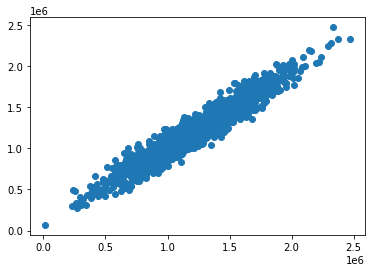

In [9]:
plt.scatter(y_test,predictions)

## Evaluating the amount of error of the linear regression model with sklearn:

In [10]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82793.01515169255
MSE: 10389982787.703987
RMSE: 101931.26501571531


## Displaying the coefficients of the resulting linear regression model:

In [11]:
coeff=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
Avg. Area Income,21.598993
Avg. Area House Age,164755.821629
Avg. Area Number of Rooms,120887.038116
Avg. Area Number of Bedrooms,1219.462360
Area Population,15.052295


## Displaying the original data set, without the categorical variables:

In [12]:
test=data.drop(['Address','Price'],axis=1)
test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


### Performing an error calculation between the predicted price from the linear model and the actual price:

In [13]:
test['Pred_price']=lm.intercept_
for i in range(len(test)):
    for j in range(len(coeff)):
        test['Pred_price'].iloc[i]=test['Pred_price'].iloc[i]+coeff['Coefficient'].iloc[j]*test.iloc[i][j]
test['error']=abs(test['Pred_price']-data['Price'])
test['error_sq']=test['error']**2
test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Pred_price,error,error_sq
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.226250e+06,167216.035914,2.796120e+10
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.494884e+06,11006.878478,1.211514e+08
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.252720e+06,193732.216725,3.753217e+10
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.120330e+06,140286.863365,1.968040e+10
4,59982.197226,5.040555,7.839388,4.23,26354.109472,8.475907e+05,216647.171290,4.693600e+10
...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060252e+06,57.838578,3.345301e+03
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.406056e+06,76561.681931,5.861691e+09
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.020000e+06,10729.891149,1.151306e+08
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.262819e+06,64161.755137,4.116731e+09


## Now, performing a linear regression using the OLS model:

In [14]:
X=sm.add_constant(X)
ols=sm.OLS(y,X).fit()

In [15]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:16:59   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.637e+06   1.72e+04   -153.708      0.000   -2.67e+06    -2.6e+06
Avg. Area Income                21.5780      0.134    160.656      0.000      21.315      21.841
Avg. Area House Age           1.656e+05   1443.413    114.754      0.000    1.63e+05    1.68e+05
Avg. Area Number of Rooms     1.207e+05   1605.160     75.170      0.000    1.18e+05    1.24e+05
Avg. Area Number of Bedrooms  1651.1391   1308.671      1.262      0.207    -914.431    4216.709
Area Population                 15.2007      0.144    105.393      0.000      14.918      15.483
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                     9.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
ols.params

const                          -2.637299e+06
Avg. Area Income                2.157805e+01
Avg. Area House Age             1.656370e+05
Avg. Area Number of Rooms       1.206599e+05
Avg. Area Number of Bedrooms    1.651139e+03
Area Population                 1.520074e+01
dtype: float64

### Performing an error calculation between the predicted price from the OLS linear model and the actual price:

In [17]:
test['Pred_price_ols']=ols.params[0]
for i in range(len(test)):
    j=1
    while j<len(ols.params):
        test['Pred_price_ols'].iloc[i]=test['Pred_price_ols'].iloc[i]+ols.params[j]*test.iloc[i][j-1]
        j+=1
test['error_ols']=abs(test['Pred_price_ols']-data['Price'])
test['error_ols_sq']=test['error_ols']**2
test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Pred_price,error,error_sq,Pred_price_ols,error_ols,error_ols_sq
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.226250e+06,167216.035914,2.796120e+10,1.223847e+06,164813.484883,2.716348e+10
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.494884e+06,11006.878478,1.211514e+08,1.494938e+06,10953.223230,1.199731e+08
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.252720e+06,193732.216725,3.753217e+10,1.253017e+06,194028.758205,3.764716e+10
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.120330e+06,140286.863365,1.968040e+10,1.121224e+06,139392.738979,1.943034e+10
4,59982.197226,5.040555,7.839388,4.23,26354.109472,8.475907e+05,216647.171290,4.693600e+10,8.453888e+05,214445.276957,4.598678e+10
...,...,...,...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060252e+06,57.838578,3.345301e+03,1.060028e+06,165.864140,2.751091e+04
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.406056e+06,76561.681931,5.861691e+09,1.405279e+06,77338.792017,5.981289e+09
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.020000e+06,10729.891149,1.151306e+08,1.020483e+06,10247.057060,1.050022e+08
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.262819e+06,64161.755137,4.116731e+09,1.263983e+06,65325.952166,4.267480e+09


## Calculating the sum of error for the two linear regression models:

In [18]:
print('Sum of error sq for sklearn:',test['error_sq'].sum())
print('Sum of error sq for OLS:',test['error_ols_sq'].sum())

Sum of error sq for sklearn: 51114360762045.45
Sum of error sq for OLS: 51098671566265.03


## Comparing the sum of errors:

In [19]:
test['error_sq'].sum()<test['error_ols_sq'].sum()

False

## In conclusion, for this specific data set, the OLS model performed better.